<a href="https://colab.research.google.com/github/chacha715/ESAA/blob/main/mini_project_%EC%B0%A8%EB%AF%BC%EA%B2%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**미니 프로젝트 : 2010년대 영화 산업 현황**
- 관련 사이트: https://dacon.io/competitions/open/235536/data

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

- 조건: 변수 2개 이상 연결한 결과값 포함

##**1. 라이브러리 및 데이터**

In [21]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,923 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [22]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
# 데이터 불러오기
train=pd.read_csv("/content/drive/MyDrive/ESAA/22-2/DATA/movies_train.csv")

##**2. 탐색적 자료분석(EDA)**

###**1) 데이터 미리보기**

In [4]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


###**2) 데이터 확인**

##### **변수 설명**
+ `title` : 영화의 제목
+ `distributor` : 배급사
+ `genre` : 장르
+ `release_time` : 개봉일
+ `time` : 상영시간(분)
+ `screening_rat` : 상영등급
+ `director` : 감독이름
+ `dir_prev_bfnum` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화에서의 평균 관객수(단 관객수가 알려지지 않은 영화 제외)
+ `dir_prev_num` : 해당 감독이 이 영화를 만들기 전 제작에 참여한 영화의 개수(단 관객수가 알려지지 않은 영화 제외)
+ `num_staff` : 스텝수
+ `num_actor` : 주연배우수
+ `box_off_num` : 관객수

In [5]:
print(train.shape)

(600, 12)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [7]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.000000,2.700000e+02,600.000000,600.000000,600.000000,6.000000e+02
mean,100.863333,1.050443e+06,0.876667,151.118333,3.706667,7.081818e+05
std,18.097528,1.791408e+06,1.183409,165.654671,2.446889,1.828006e+06
min,45.000000,1.000000e+00,0.000000,0.000000,0.000000,1.000000e+00
25%,89.000000,2.038000e+04,0.000000,17.000000,2.000000,1.297250e+03
50%,100.000000,4.784236e+05,0.000000,82.500000,3.000000,1.259100e+04
75%,114.000000,1.286569e+06,2.000000,264.000000,4.000000,4.798868e+05
max,180.000000,1.761531e+07,5.000000,869.000000,25.000000,1.426277e+07


###**3) 결측치 확인 및 데이터 전처리**

In [8]:
#결측치 확인
train.isna().sum()

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [9]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [10]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum()) #모두 dir_prev_num이 0이다

0


In [11]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

In [12]:
#release_time을 int -> datatime 형태로 변환
train['release_time']=pd.to_datetime(train['release_time'])

In [13]:
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.00,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387


###**4) 영화 관객수 분석**

####**4-1) 주연배우수 vs 스텝수**

In [ ]:
train['num_actor'].describe()

count    600.000000
mean       3.706667
std        2.446889
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       25.000000
Name: num_actor, dtype: float64

Text(0, 0.5, 'num_staff')

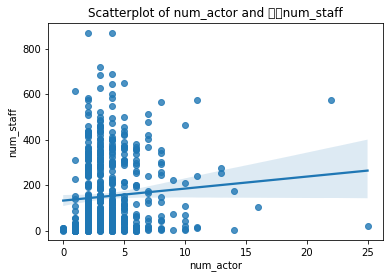

In [ ]:
plt.rcParams['font.family']='Gothic'
ax=plt.subplots()
ax=sns.regplot(x='num_actor',y='num_staff',data=train)
ax.set_title('Scatterplot of num_actor and 스탭num_staff')
ax.set_xlabel('num_actor')
ax.set_ylabel('num_staff')

In [ ]:
train[['num_actor','num_staff']].corr()

,num_actor,num_staff
num_actor,1.000000,0.077871
num_staff,0.077871,1.000000


In [ ]:
train['director'].unique()

array(['조병옥', '우민호', '장철수', '구자홍', '신근호', '육상효', '이창재', '임상윤', '정성복',
       '변성현', '조조 히데오', '양병간', '최종태', '한종훈', '윤학렬', '홍상수', '강형철', '린슈유',
       '부지영', '이재용', '안국진', '동지견', '권칠인', '김재한', '손승웅', '류훈', '김철한',
       '한상희', '장진', '김규민', '최윤석', '김관철', '황인호', '장희선', '김조광수', '김기덕',
       '오멸', '전계수', '최원섭', '민규동', '진승현', '도창훈', '류승완', '전수일', '신연식',
       '하기호', '최호', '방형우', '박용집', '정범식', '김상철', '배성상', '남기웅', '김기영',
       '곽경택', '김성호', '문인수', '최용석', '이지형', '이종필', '손영성', '정기훈', '김인식',
       '김진민', '이영미', '김희정', '이정범', '손석', '정우철', '박재식', '전형준', '김상석',
       '에밀리오 에스테베즈', '김상만', '김태용', '신수원', '정연식', '지민', '한동호', '손영국',
       '김동명', '김대우', '송해성', '방현준', '소재영', '최시형', '엄태화', '연상호', '김동빈',
       '김진무', '조근현', '한재림', '임흥순', '김휘', '전재홍', '신재영', '김경만', '경순',
       '타케 마사하루', '신태라', '배창호', '윤종빈', '배광수', '김성수', '박진표', '권혁만', '심형래',
       '오인천', '장희철', '김병준', '양우석', '김덕수', '이재규', '이창규', '구수환', '허은희',
       '김석윤', '고석진', '최경석', '이해준', '하마구치 류스케', '오기환', '홍재희', '조원희', '장훈',
       '정익환', '박

### **5) 영화 배급사 분석**

#### **5-1) 배급사별 장르 추이**

In [18]:
#영화를 가장 많이 제작하는 배급사 top10
train['distributor'].value_counts().sort_values(ascending=False)[:10]

CJ 엔터테인먼트    54
롯데엔터테인먼트     52
(주)NEW       30
(주)마운틴픽쳐스    29
(주)쇼박스       26
인디스토리        26
골든타이드픽처스     15
(주) 케이알씨지    14
(주) 영화사조제    10
영화사 진진       10
Name: distributor, dtype: int64

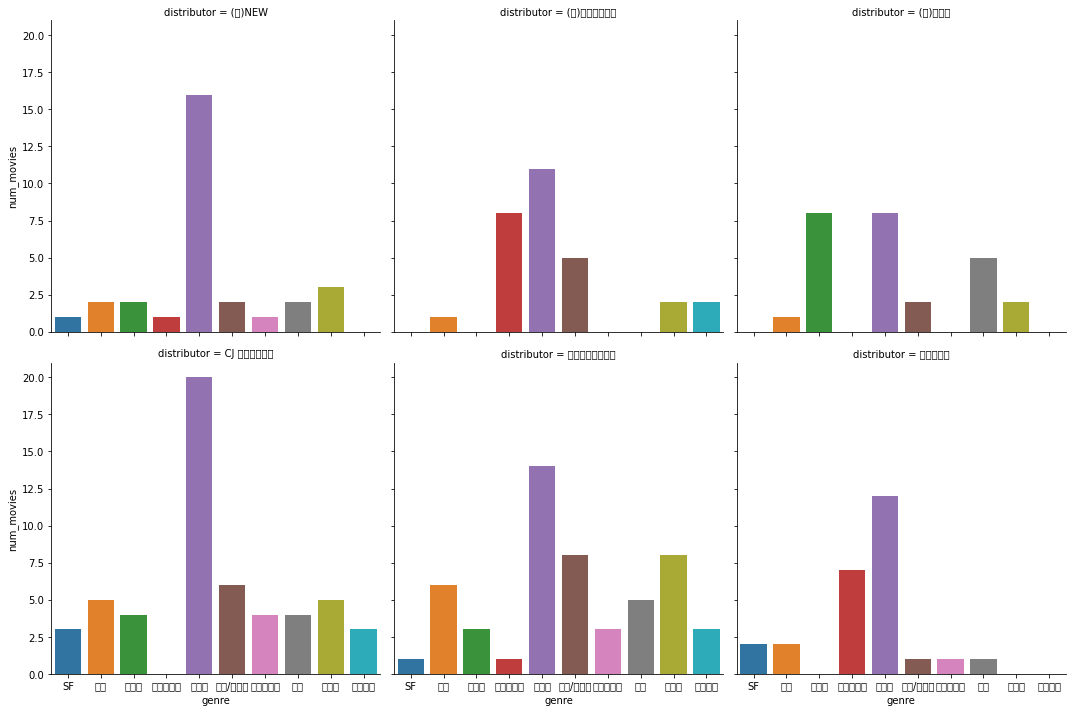

In [25]:
#방법1 : 배급사별 그래프 그리기, 스케일링 해서 비교?
train_top6 = train['distributor'].value_counts().head(6)

train_dt_genre = train.groupby(['distributor', 'genre'])['title'].count().reset_index()
train_dt_genre.columns = ['distributor', 'genre', 'num_movies']

train_distributor_genre = train_dt_genre[train_dt_genre['distributor'].isin(train_top6.index)].copy() #상위 배급사 자료만

ax = sns.catplot(data=train_distributor_genre, x='genre', y='num_movies',
            kind='bar', col='distributor', col_wrap=3)

              title distributor genre release_time  time screening_rat  \
0            개들의 전쟁    롯데엔터테인먼트    액션   2012-11-22    96      청소년 관람불가   
1              내부자들      (주)쇼박스   느와르   2015-11-19   130      청소년 관람불가   
2         은밀하게 위대하게      (주)쇼박스    액션   2013-06-05   123       15세 관람가   
3          나는 공무원이다      (주)NEW   코미디   2012-07-12   101        전체 관람가   
5    강철대오 : 구국의 철가방    롯데엔터테인먼트   코미디   2012-10-25   113       15세 관람가   
..              ...         ...   ...          ...   ...           ...   
595              해무      (주)NEW   드라마   2014-08-13   111      청소년 관람불가   
596            파파로티      (주)쇼박스   드라마   2013-03-14   127       15세 관람가   
597           살인의 강   (주)마운틴픽쳐스    공포   2010-09-30    99      청소년 관람불가   
598          악의 연대기   CJ 엔터테인먼트   느와르   2015-05-14   102       15세 관람가   
599             베를린   CJ 엔터테인먼트    액션   2013-01-30   120       15세 관람가   

    director  dir_prev_bfnum  dir_prev_num  num_staff  num_actor  box_off_num  
0        조병옥            0.00   

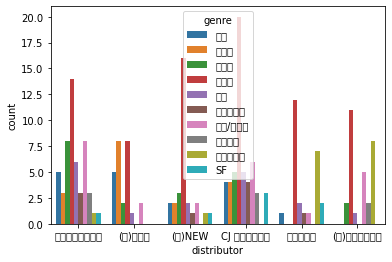

In [24]:
#방법2 : 한 그래프에 모아서 그리기
#top5 배급사의 자료만 뽑아내기
dist_list = ['CJ 엔터테인먼트','롯데엔터테인먼트','(주)NEW','(주)마운틴픽쳐스','(주)쇼박스', '인디스토리']
train_top6 = train[train['distributor'].isin(dist_list)]

print(train_top6)

#distributor 별 장르의 수 시각화
ax = plt.subplots()
ax = sns.countplot('distributor',data=train_top6,hue='genre')

#### **5-2) 배급사 점유율과 관객수 비교**

Text(0, 0.5, '관객수')

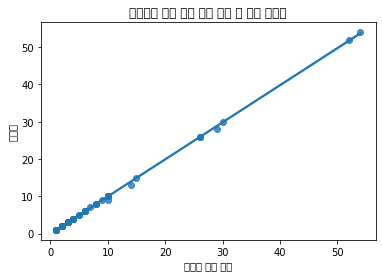

In [17]:
movie_count_by_dist = pd.DataFrame(train['distributor'].value_counts())
movie_count_by_dist

def box(list):
  return list.shape[0]
box_num_by_dist = pd.DataFrame(pd.DataFrame(train.groupby('distributor')['box_off_num'].unique())['box_off_num'].map(box).sort_values())
box_num_by_dist 


dist_box = pd.concat([movie_count_by_dist,box_num_by_dist],axis=1)
dist_box


ax = plt.subplots()
ax = sns.regplot(dist_box['distributor'],dist_box['box_off_num'],logx=False)
ax.set_title('배급사별 영화 상영 수와 관객 수 간의 산점도')
ax.set_xlabel('상영한 영화 개수')
ax.set_ylabel('관객수')

In [20]:
#감독이름별 가장 많이 제작한 장르 => 가장 많이 만든 감독이 7개, 1개만 만든 감독도 너무 많아서 무의미할 것 같음